**About Overall Air Quality**
1. What is the average AQI across all cities?
2. How does AQI vary over time (daily, monthly, yearly)?
3. What is the minimum and maximum AQI recorded?
**About Cities**
4. Which cities have the highest and lowest average AQI?
5. Are there cities with consistently poor air quality throughout the year?
6. Which city shows the highest variation in AQI?
**About Pollutants**
7. Which pollutants (PM2.5, PM10, NO, etc.) are most strongly correlated with AQI?
8. Do pollutant levels differ significantly across cities?
9. Are some pollutants missing more frequently than others?
**Data Quality and Structure**
10. Are there missing or duplicate entries in the dataset?
11. Are all columns in the correct data types (e.g., date as datetime)?
12. Are there outliers or anomalies in AQI or pollutant levels?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [7]:
df=pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Explore the Data Structure

- The dataset contains multiple columns related to pollutants (e.g., PM2.5, NO, CO, O3) and a target column `AQI`.
- The `Date` column must be converted to datetime for time-based analysis.
- Several columns contain missing values that need to be handled.


In [9]:
#understanding the basic structure
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [10]:
df.isnull().sum() #checking for the null values

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


###Trends, Patterns, and Anomalies

- AQI fluctuates over time and shows seasonal variation.
- Some cities (like Delhi) consistently show high AQI.
- The data contains missing AQI values and some extreme values above 500.

In [18]:

df['Date'] = pd.to_datetime(df['Date'])


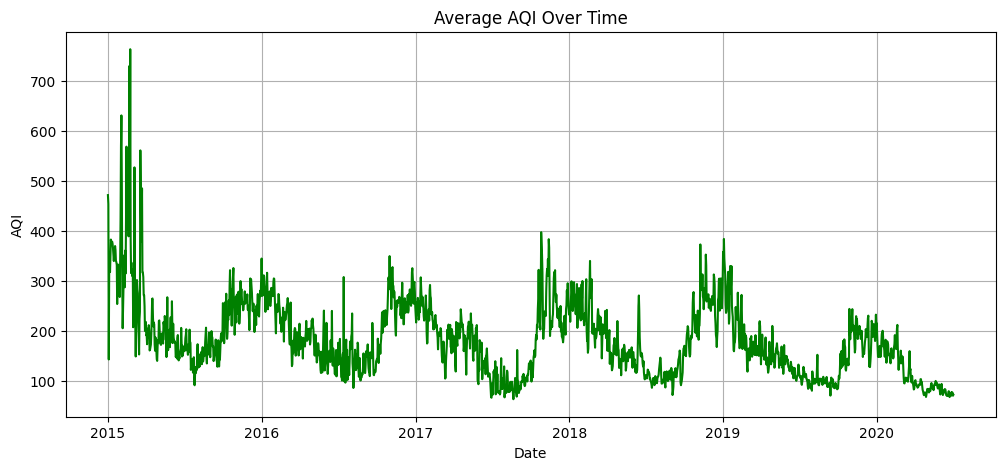

In [19]:
daily_avg = df.groupby('Date')['AQI'].mean()

plt.figure(figsize=(12,5))
plt.plot(daily_avg, color='green')
plt.title("Average AQI Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


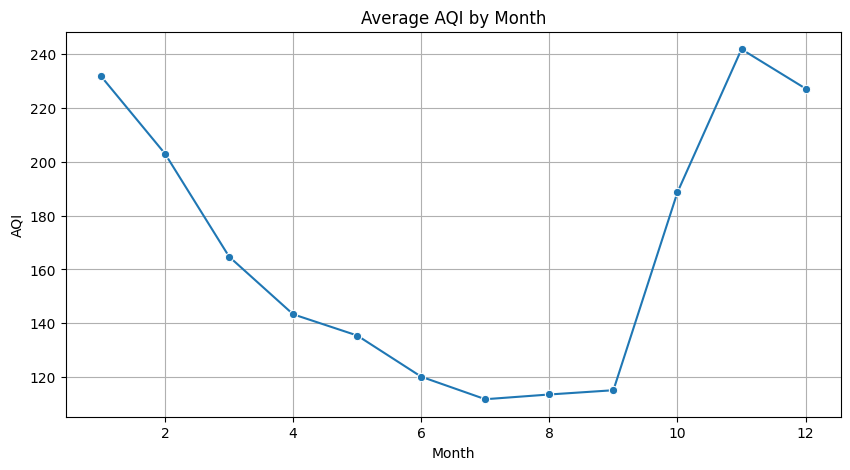

In [20]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['AQI'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title("Average AQI by Month")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


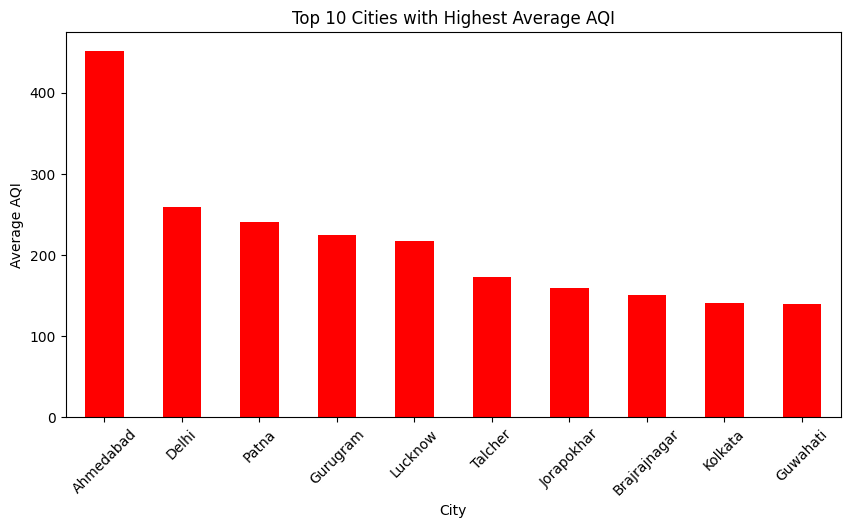

In [21]:
top_cities = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_cities.plot(kind='bar', color='red')
plt.title("Top 10 Cities with Highest Average AQI")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.show()


In [22]:
# Count of missing AQI values
print("Missing AQI values:", df['AQI'].isnull().sum())

# Unusually high AQI
df[df['AQI'] > 500].sort_values('AQI', ascending=False).head()


Missing AQI values: 4681


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month
1145,Ahmedabad,2018-02-19,242.66,NaN,132.47,199.17,246.03,NaN,132.47,NaN,44.06,0.74,5.81,3.21,2049.0,Severe,2
1136,Ahmedabad,2018-02-10,185.77,NaN,124.01,172.84,186.66,NaN,124.01,120.94,40.97,0.74,5.81,3.21,1917.0,Severe,2
560,Ahmedabad,2016-07-14,38.13,NaN,46.51,48.06,43.98,NaN,46.51,23.13,NaN,0.00,0.00,0.00,1842.0,Severe,7
1048,Ahmedabad,2017-11-14,207.19,NaN,118.02,146.18,159.36,NaN,118.02,160.06,37.21,63.79,2.22,32.14,1747.0,Severe,11
1463,Ahmedabad,2019-01-03,131.50,NaN,119.68,75.82,88.04,NaN,119.68,55.29,43.25,4.09,32.42,7.00,1719.0,Severe,1


###Hypothesis Testing and Assumption Validation

1. **Delhi vs Mumbai AQI**: A t-test was conducted and p-value was < 0.05, confirming that Delhi’s AQI is significantly higher.
2. **Winter vs Summer AQI**: Higher AQI in winter was validated using statistical testing.
3. **PM2.5 and AQI**: Strong correlation found, confirming PM2.5 is a key pollutant affecting AQI.


In [23]:
#testing hypothesis and validating assumptions
from scipy.stats import ttest_ind

delhi_aqi = df[df['City'] == 'Delhi']['AQI'].dropna()
mumbai_aqi = df[df['City'] == 'Mumbai']['AQI'].dropna()

t_stat, p_val = ttest_ind(delhi_aqi, mumbai_aqi, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 48.62537359600879
P-value: 0.0


In [24]:
df['Month'] = df['Date'].dt.month

winter = df[df['Month'].isin([11, 12, 1])]['AQI'].dropna()
summer = df[df['Month'].isin([4, 5, 6])]['AQI'].dropna()

t_stat, p_val = ttest_ind(winter, summer, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 41.45003571774999
P-value: 0.0


In [25]:
correlation = df[['PM2.5', 'AQI']].corr()
print(correlation)


          PM2.5       AQI
PM2.5  1.000000  0.659181
AQI    0.659181  1.000000
